# Лабораторная работа 2.1. Вариант 39. Едленко

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from keras.utils import to_categorical
from keras import models
from keras import layers
from google.colab import files

In [12]:
def my_func(x,y):
    return -((3 / (x*x + 8)) + (5 / (y*y + 8))) # Возвращает значение функции от x,y

In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_diff(y):
    return y*(1 - y)


In [14]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [15]:
class NeuralNetwork:
    def __init__(self, x, y): # m - объём датасета

        #Входные значения
        self.x          = x
        self.y          = y

        self.diam_s     = 5 #Количество нейронов
        self.alpha      = 0.1 #Шаг альфа

        #Веса
        self.weights1   = np.random.rand(self.diam_s, self.x.shape[0])
        self.weights2   = np.random.rand(1, self.diam_s)
        self.bias       = np.random.rand(self.diam_s, 1)
        self.b          = np.random.rand()

        self.o2         = np.zeros(self.y.shape)
        
    #Функция прямого распостранения
    def feedforward(self):
        self.o1 = sigmoid(np.dot(self.weights1, self.x) + self.bias)
        self.o2 = np.dot(self.weights2, self.o1) + self.b
        
    #Функция обратного распостранения
    def backprop(self):
        d_weights2 = 2*np.dot((self.y - self.o2),self.o1.T) # 1xk
        d_weights1 = 2*self.weights2.T*np.dot((self.y - self.o2)*sigmoid_diff(self.o1),self.x.T )
        d_bias     = 2*self.weights2.T*np.dot(sigmoid_diff(self.o1), (self.y - self.o2).T)
        d_b        = 2*(self.y - self.o2).sum()

        self.weights1 += self.alpha * d_weights1/self.x.shape[1]
        self.weights2 += self.alpha * d_weights2/self.x.shape[1]
        self.bias     += self.alpha * d_bias/self.x.shape[1]
        self.b        += self.alpha * d_b/self.x.shape[1]

    def result(self, t):
        return np.dot(self.weights2, sigmoid(np.dot(self.weights1, t) + self.bias)) + self.b

In [16]:
X = np.arange(-20, 20, 1)
Y = np.arange(-20, 20, 1)
X, Y = np.meshgrid(X, Y)
X1, Y1 = X.ravel(), Y.ravel()
Z1 = my_func(X1, Y1)
Xd = np.array([X1,Y1])
Xd.shape
Zd = np.array([list(Z1)])
Zd.shape
z = NeuralNetwork(Xd,Zd)

In [17]:
i = 0
while(mse_loss(Zd, z.result(Xd))>0.0001):
    z.feedforward()
    z.backprop()
    i+=1
    #if(i % 1000 == 0):
      #print(mse_loss(Zd, z.result(Xd)))
    if(i > 999999):
      break

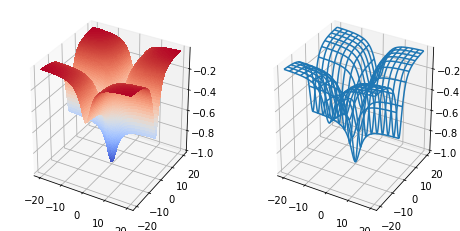

In [18]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = my_func(X, Y)
#X, Y, Z = get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

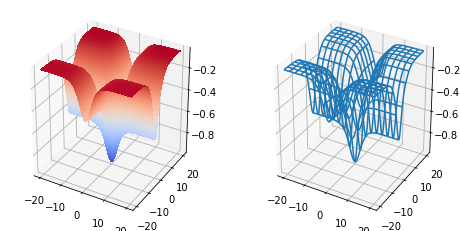

In [19]:
fig_2 = plt.figure(figsize=plt.figaspect(0.5))

ax_2 = fig_2.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20.25, 0.25)
Y = np.arange(-20, 20.25, 0.25)
X, Y = np.meshgrid(X, Y)

Z = z.result(np.array([X.ravel(),Y.ravel()])).reshape((161,161))

ax_2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax_2 = fig_2.add_subplot(1, 2, 2, projection='3d')

ax_2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

weights1 =  [[0.55547275 0.07422527]
 [0.46956485 0.12634727]
 [0.93463257 0.14449363]
 [0.19359673 0.57183928]
 [0.34705517 0.36872481]] 
 weights2 =  [[0.96133142 0.04341469 0.59459365 0.43494387 0.45622894]] 
 bias =  [[0.19796126]
 [0.29562944]
 [0.5628563 ]
 [0.73253794]
 [0.40805714]] 
 b =  0.523078603405175